# Machine Learning using Python 
# Exam – Paper 
## Part I: Unsupervised Learning 
## Problem Statements & Tasks:
### The data ‘sentiment.csv’ contains all information about the tweet, but for this exercise, use the text and sentiment(only positive and negative sentiments) columns. Perform all the necessary data cleaning required and answer the questions below:
### Q1. Print the total number of positive and negative sentiments.
### Q1. Print the total number of positive and negative sentiments.
### Q3. Based on the model, check the sentiment for the following two sentences
#### a. 'He is a great leader.'
#### b. 'He is a terrible leader.'

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("Sentiment.csv")

In [16]:
df.sample(5)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
1552,1553,No candidate mentioned,0.4539,yes,0.6737,Positive,0.3474,None of the above,0.4539,NaN,...,NaN,0,NaN,NaN,Support 1 U like #TCOT This is STILL America b...,NaN,2015-08-07 09:40:07 -0700,629693514331389952,America,NaN
2553,2554,Ted Cruz,0.3941,yes,0.6277,Positive,0.6277,None of the above,0.3941,NaN,...,NaN,7,NaN,NaN,"RT @Laural4705: #GOPDebate my opinion, cruz ha...",NaN,2015-08-07 09:29:28 -0700,629690835152568320,"SE Georgia, USA",Eastern Time (US & Canada)
2735,2736,No candidate mentioned,1.0000,yes,1.0000,Negative,0.6818,Jobs and Economy,1.0000,NaN,...,NaN,0,NaN,NaN,"Hmm, just found out that as CEO of HP, Carly F...",NaN,2015-08-07 09:27:22 -0700,629690306687012864,United States,Pacific Time (US & Canada)
1274,1275,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.6386,NaN,...,NaN,0,NaN,NaN,@CarlyFiorina heard some of your response fro...,NaN,2015-08-07 09:43:15 -0700,629694302227070976,"Birmingham,Al",Central Time (US & Canada)
3715,3716,No candidate mentioned,0.4444,yes,0.6667,Negative,0.6667,Women's Issues (not abortion though),0.4444,NaN,...,NaN,110,NaN,NaN,RT @whereisnatasha: What does the #GOPDebate h...,NaN,2015-08-07 09:15:43 -0700,629687371525591040,NaN,Eastern Time (US & Canada)


In [17]:
df.count()

id                           13871
candidate                    13775
candidate_confidence         13871
relevant_yn                  13871
relevant_yn_confidence       13871
sentiment                    13871
sentiment_confidence         13871
subject_matter               13545
subject_matter_confidence    13871
candidate_gold                  28
name                         13871
relevant_yn_gold                32
retweet_count                13871
sentiment_gold                  15
subject_matter_gold             18
text                         13871
tweet_coord                     21
tweet_created                13871
tweet_id                     13871
tweet_location                9959
user_timezone                 9468
dtype: int64

In [18]:
# Checking the Shape of Dataset
df.shape 

(13871, 21)

In [19]:
# Getting detail on the feature of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [23]:
for i in df.columns:
    print(i,'=',df[i].isnull().sum(),df[i].dtype)

id = 0 int64
candidate = 96 object
candidate_confidence = 0 float64
relevant_yn = 0 object
relevant_yn_confidence = 0 float64
sentiment = 0 object
sentiment_confidence = 0 float64
subject_matter = 326 object
subject_matter_confidence = 0 float64
name = 0 object
retweet_count = 0 int64
text = 0 object
tweet_created = 0 object
tweet_id = 0 int64
tweet_location = 3912 object
user_timezone = 4403 object


In [21]:
# Dropping Useless Columns

df.drop('candidate_gold', inplace = True, axis = 1)
df.drop('relevant_yn_gold', inplace = True, axis = 1)
df.drop('sentiment_gold', inplace = True, axis = 1)
df.drop('subject_matter_gold', inplace = True, axis = 1)
df.drop('tweet_coord',inplace = True, axis = 1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   name                       13871 non-null  object 
 10  retweet_count              13871 non-null  int64  
 11  text                       13871 non-null  object 
 12  tweet_created              13871 non-null  object 
 13  tweet_id                   13871 non-null  int

<AxesSubplot:>

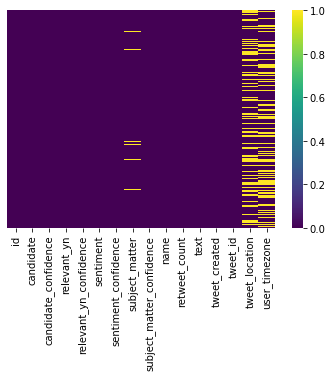

In [26]:
# Checking visually for missing values
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [27]:
# Treating Missing Values:
for i in df.columns:
    if df[i].dtype in ["int64","float64"]:
        df[i].fillna(df[i].median(),inplace=True)
    else:
        df[i].fillna(df[i].mode()[0],inplace=True)

<AxesSubplot:>

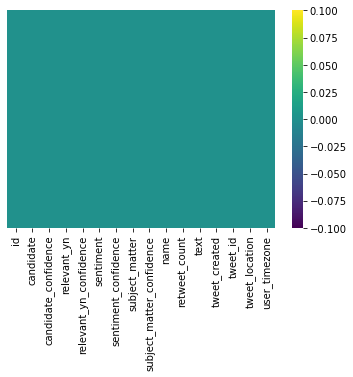

In [28]:
# Rechecking visually for missing values
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [29]:
# Rechecking for missing values
for i in df.columns:
    print(i,'=',df[i].isnull().sum(),df[i].dtype)

id = 0 int64
candidate = 0 object
candidate_confidence = 0 float64
relevant_yn = 0 object
relevant_yn_confidence = 0 float64
sentiment = 0 object
sentiment_confidence = 0 float64
subject_matter = 0 object
subject_matter_confidence = 0 float64
name = 0 object
retweet_count = 0 int64
text = 0 object
tweet_created = 0 object
tweet_id = 0 int64
tweet_location = 0 object
user_timezone = 0 object


# Missing values are dealt with

In [31]:
df.head(2)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,name,retweet_count,text,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0,I_Am_Kenzi,5,RT @NancyLeeGrahn: How did everyone feel about...,2015-08-07 09:54:46 -0700,629697200650592256,USA,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0,PeacefulQuest,26,RT @ScottWalker: Didn't catch the full #GOPdeb...,2015-08-07 09:54:46 -0700,629697199560069120,USA,Eastern Time (US & Canada)


### Filling NaN values

# Task Q1. Print the total number of positive and negative sentiments.

In [32]:
mood_count = df['sentiment'].value_counts()
mood_count

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

# Task Q1 Completed

# Task Q2. Build a sequential LSTM model to predict positive and negative sentiments.

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])
df.head(2)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,name,retweet_count,text,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,1,0.6578,None of the above,1.0,I_Am_Kenzi,5,RT @NancyLeeGrahn: How did everyone feel about...,2015-08-07 09:54:46 -0700,629697200650592256,USA,Quito
1,2,Scott Walker,1.0,yes,1.0,2,0.6333,None of the above,1.0,PeacefulQuest,26,RT @ScottWalker: Didn't catch the full #GOPdeb...,2015-08-07 09:54:46 -0700,629697199560069120,USA,Eastern Time (US & Canada)


In [35]:
import re
import nltk
from nltk.corpus import stopwords

In [36]:
import nltk 
nltk.download('stopwords')
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roshs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
df['clean_tweet'] = df['text'].apply(lambda x: tweet_to_words(x))

In [38]:
df_clean_tweet=[]
for tweet in df['clean_tweet']:
    df_clean_tweet.append(tweet)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
df_features= v.fit_transform(df_clean_tweet)

In [42]:
df_features

<13871x18866 sparse matrix of type '<class 'numpy.int64'>'
	with 155069 stored elements in Compressed Sparse Row format>

In [43]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
nb = MultinomialNB()

In [45]:
nb.fit(train_features,df['sentiment'])
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(nb.predict(train_features),df['sentiment'])
print(accuracy)

0.8129190397231635


In [28]:
test_features

<3660x11471 sparse matrix of type '<class 'numpy.int64'>'
	with 33563 stored elements in Compressed Sparse Row format>

In [30]:
test_pred = nb.predict(test_features)
test_pred = le.inverse_transform(test_pred)
print(test_pred)
np.savetxt("test_pred.csv",test_pred,fmt='%s')

['negative' 'negative' 'negative' ... 'neutral' 'positive' 'neutral']


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
clf = RandomForestClassifier(n_estimators = 200)

In [33]:
train_features

<10980x11471 sparse matrix of type '<class 'numpy.int64'>'
	with 107004 stored elements in Compressed Sparse Row format>

In [34]:
clf.fit(train_features,train['airline_sentiment'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(clf.predict(train_features),train['airline_sentiment'])
print(accuracy)

0.995719489981785


In [36]:
test_pred = clf.predict(test_features)

In [37]:
test_pred = le.inverse_transform(test_pred)

In [38]:
np.savetxt("predicttwtit.csv",test_pred,fmt='%s')

In [39]:
print(test_pred)

['negative' 'neutral' 'negative' ... 'neutral' 'positive' 'negative']
